# Kurzfristige Bucher +  Ziele

Ziel dieser Analyse ist es, die 
- kurzfristigen Bucher zu finden, wobei kurzfristig heißt: Unterschied zwischen Buchung und Reiseantritt ist weniger als 1 Monat
- Ziele dieser kurzfistigen Bucher zu finden
- ob sie "Wiederholungstäter" sind

### Laden der Bibiliotheken und Einlesen der Daten

In [1]:
import pandas as pd
%pylab inline

# no zeros even if not int
pd.set_option('precision', 3)
pd.set_option('display.max_rows' , 999)

Populating the interactive namespace from numpy and matplotlib


In [2]:
dat = pd.read_pickle('allDat.pkl')
dat_de = pd.read_pickle('deDat.pkl')

### Baunternehmer und Reiseveranstalter rausfiltern

In [5]:
# Filter für Bauunternehmer und Reisveranstalter
Bauunternehmer_Email_List =['roman.boll@gmx.net','info@ingmont.com', 'estrich', 
                      'construction', 'rkm-industrieservice', 'gebr-nowack.de','heizung','stahlbau',
                      'strabag','spitzke','the-m-group','miebach-group','montage',
                            'koecher-ladenbau','bauservice','metallbau','ethosenergygroup','roehrsag']
Bauunternehmer_Name_List = ['spitzke', 'strabag', 'danmark']

Reiseveranstalter_Email_List = ['sven.kahrs@kkbz.de','sven.kahrs@kkbz.de','atraveo', 
                          'reisen','reisebuero', 'interhome', 'schulfahrt', 'dfb.nl', 'wsmfunsport', 
                          'tours', 'flugboerse','erholung','dancenter','reiseland','wolters.tui',
                                'guest.booking.com',
                               'danland']

emails = dat['E-Mail '].tolist()
names = dat['Kundenname'].tolist()

all_entries__in_dat_found_by_lists = {}

var_names = ['Reiseveranstalter_emails','Bau_emails','Bau_names']
list_names = [Reiseveranstalter_Email_List, Bauunternehmer_Email_List, Bauunternehmer_Name_List]
lists_to_search = [emails, emails, names]

for idx, listname in enumerate(list_names):
    all_entries__in_dat_found_by_lists[var_names[idx]] = []

    for email in lists_to_search[idx]:
        for pat in listname:
            if pat in email:
                all_entries__in_dat_found_by_lists[var_names[idx]].append(email)
                
    all_entries__in_dat_found_by_lists[var_names[idx]] = unique(all_entries__in_dat_found_by_lists[var_names[idx]])


    print(var_names[idx]+':')
    print(len(all_entries__in_dat_found_by_lists[var_names[idx]]))
    print('')

Reiseveranstalter_emails:
4459

Bau_emails:
122

Bau_names:
31



In [ ]:
dat['length_travel'].

In [6]:
# Bauunternehmer und Reisebüros rausnehmen
dat_wo_bau_reise = dat.loc[-((dat['Kundenname'].isin(all_entries__in_dat_found_by_lists['Bau_names'])) | 
                     (dat['E-Mail '].isin(all_entries__in_dat_found_by_lists['Bau_emails'])) |
                     (dat['E-Mail '].isin(all_entries__in_dat_found_by_lists['Reiseveranstalter_emails'])))]

# Einträge ohne E-Mail rausnehmen, weil keine Ansprechmöglichkeit
dat_wo_bau_reise_email = dat_wo_bau_reise[-(dat_wo_bau_reise['E-Mail ']=='0000')]

### Extrahieren der Kurzbuchungen

(38526, 40)

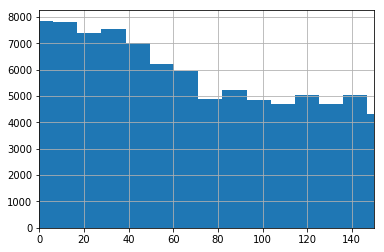

In [7]:
# filter für Kurzentschlossene = Buchungszeit zwischen Buchung und Anreise weniger als 35 Tage
fast_book = dat_wo_bau_reise_email.loc[dat_wo_bau_reise_email['time_btw_book_travel_days']<=50].copy()
ax=dat_wo_bau_reise_email['time_btw_book_travel_days'].hist(bins=80)
ax.set_xlim(0,150)
fast_book.shape

### Some Numbers

In [49]:
print(dat.shape)
print(fast_book.shape)

(183511, 40)
(38526, 40)


#### Destinations

In [9]:
print((dat.groupby('Hausnation').size()/183511)*100)
print((fast_book.groupby('Hausnation').size()/38526)*100)

Hausnation
D     12.358
DK    76.302
N      5.558
SE     5.783
dtype: float64
Hausnation
D     11.582
DK    83.450
N      1.661
SE     3.307
dtype: float64


#### Anzahl der Personen

4.0
4.512639569290124
3.0
3.6211649275813738


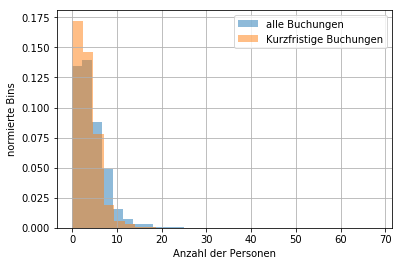

In [56]:
print(dat.Personen.median())
print(dat.Personen.mean())
print(fast_book.Personen.median())
print(fast_book.Personen.mean())
plt=dat.Personen.hist(bins=30,density=True,alpha=0.5)
plt=fast_book.Personen.hist(bins=17,density=True,alpha=0.5)
plt.legend(['alle Buchungen','Kurzfristige Buchungen'])
_=plt.set_xlabel(xlabel='Anzahl der Personen')
_=plt.set_ylabel('normierte Bins')

In [12]:
dat.groupby('Personen').size().to_csv('Personenanzahl_alleBuchungen.csv')
fast_book.groupby('Personen').size().to_csv('Personenanzahl_Kurzbuchungen.csv')

#### Teure Buchung

In [16]:
print(dat.Mietpreis_Euro.describe())
print(fast_book.Mietpreis_Euro.describe())

count    183511.000
mean        931.691
std         673.404
min           0.000
25%         480.000
50%         734.000
75%        1167.000
max       10914.000
Name: Mietpreis_Euro, dtype: float64
count    38526.000
mean       648.302
std        446.117
min          0.000
25%        360.000
50%        521.000
75%        782.000
max       6367.000
Name: Mietpreis_Euro, dtype: float64


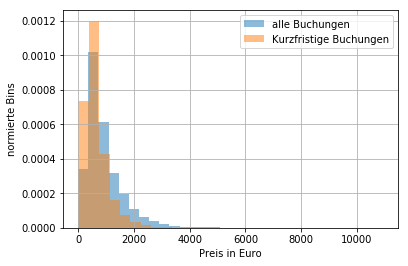

In [20]:
plt=dat.Mietpreis_Euro.hist(bins=30,density=True,alpha=0.5)
plt=fast_book.Mietpreis_Euro.hist(bins=17,density=True,alpha=0.5)
plt.legend(['alle Buchungen','Kurzfristige Buchungen'])
_=plt.set_xlabel(xlabel='Preis in Euro')
_=plt.set_ylabel('normierte Bins')

In [62]:
print(dat.loc[dat.Mietpreis_Euro>=1167].shape[0]/183511)
print(fast_book.loc[fast_book.Mietpreis_Euro>=1167].shape[0]/38526)

0.2502465792241337
0.10330685770648393


#### Anreisemonat

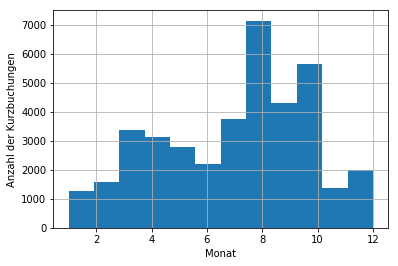

In [19]:
ax=fast_book.month_of_travel.hist(bins=12)
ax.set_xlabel('Monat')
ax.set_ylabel('Anzahl der Kurzbuchungen')
fast_book.groupby('month_of_travel').size().to_csv('Anreisemonat_Kurzbuchung.csv')
dat.groupby('month_of_travel').size().to_csv('Anreisemonat_alleBuchungen.csv')

In [67]:
fast_book.groupby('month_of_travel').size()

month_of_travel
1     1287
2     1570
3     3376
4     3117
5     2805
6     2195
7     3749
8     7146
9     4292
10    5644
11    1365
12    1980
dtype: int64

#### Tage vor Anreise

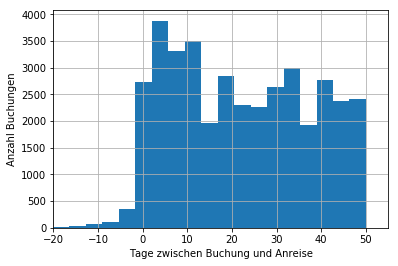

In [14]:
ax = fast_book.time_btw_book_travel_days.hist(bins=100)
ax.set_xlim([-20,55])
ax.set_xlabel('Tage zwischen Buchung und Anreise')
ax.set_ylabel('Anzahl Buchungen')

fast_book.groupby('time_btw_book_travel_days').size().to_csv('TageVorAnreise_Kurzbuchung.csv')

#### Direktbuchung

In [102]:

print((dat.groupby('Buchung: direkt/indirekt').size()/183511)*100)
print((fast_book.groupby('Buchung: direkt/indirekt').size()/38526)*100)


Buchung: direkt/indirekt
Bur    49.747
Dir    50.253
dtype: float64
Buchung: direkt/indirekt
Bur    42.306
Dir    57.694
dtype: float64


#### Länge der Reise

9.444899760777282
7.0
7.816876914291647
7.0


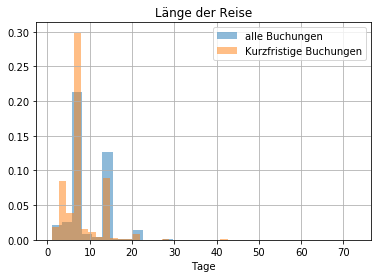

In [15]:
print(dat['length_travel'].mean())
print(dat['length_travel'].median())
print(fast_book['length_travel'].mean())
print(fast_book['length_travel'].median())

plt=dat['length_travel'].hist(bins=30,density=True,alpha=0.5)
plt=fast_book['length_travel'].hist(bins=30,density=True,alpha=0.5)
plt.set_title('Länge der Reise')
plt.legend(['alle Buchungen','Kurzfristige Buchungen'])
_=plt.set_xlabel(xlabel='Tage')

dat.groupby('length_travel').size().to_csv('Reiselaenge_allBuchungen.csv')
fast_book.groupby('length_travel').size().to_csv('Reiselaenge_Kurzbuchungen.csv')


### Helper functions for collapsing series to one data entry

In [6]:
def concat_num(dat):
    not_na =[]
    for x in dat:
        if not np.isnan(x):
            not_na.append(str(int(x)))
         
    res = not_na[0]
    if len(not_na)>1:
        for x in not_na[1:]:
            res = res + ','+x
    return res

def concat_str(dat):
    not_na =[]
    for x in dat:
        if isinstance(x,str):
            not_na.append(x)
         
    res = not_na[0]
    if len(not_na)>1:
        for x in not_na[1:]:
            res = res + ','+x
    return res

def is_in(dat, str_to_test):
    not_na =[]
    for x in dat:
        if isinstance(x,str):
            not_na.append(x)
         
    if str_to_test in not_na:
        return 'j'
    else:
        return 'n'

### Dictionaries for Travel Destinies

In [19]:
area = {'Nordsee - DK':[80,81,82,83,84,85,88,89,77],
        'Ostsee und Landesinnere': [71,72,73,74,75,76,78,61,62,63],
        'Inseln': [51,52,41,42,43,44,45,46,47,48,49,31],
        'Nordsee - DE':[2],
        'Ostsee - DE':[4],
        'Sued- und Fjordnorwegen':[17,18,19,20,21,22,23],
        'Mittelnorwegen': [24,25],
        'Ostnorwegen':[11,12,13,14,15],
        'Nordnorwegen':[26,27,28],
        'Sued- und Westschweden':[90,91,93],
        'Nord- und Mittelschweden':[95,96],
         'not assigned': [30,34,94]}

country = {'Daenemark': area['Nordsee - DK']+area['Ostsee und Landesinnere'] + area['Inseln'],
           'Deutschland':area['Nordsee - DE']+area['Ostsee - DE'],
           'Norwegen': area['Sued- und Fjordnorwegen']+area['Mittelnorwegen']+
                       area['Ostnorwegen']+area['Nordnorwegen'],
           'Schweden': area['Sued- und Westschweden']+area['Nord- und Mittelschweden'],
           'not assigned': area['not assigned']}

### Buchungen zusammenführen

In [ ]:
## Wiederkehrer finden
# nur Reisen mit gleichen E-mails und unterschiedlichen Abreisedaten sind Wiederkehrer
# Reisen mit gleichen E-Mails und gleichen Abreisedaten werden gedropped
dat_wo_bau_reise_email = dat_wo_bau_reise_email.drop_duplicates(subset=['E-Mail ','Anreise'])

# alle Buchungen, von Kunden, die mind. einmal eine kurzfristige Buchung getätigt haben
alle_buchungen_fast_book = dat_wo_bau_reise_email.loc[dat_wo_bau_reise_email['E-Mail '].isin(fast_book['E-Mail '])]

In [7]:
## Buchungen werden über die E-Mail zusammengeführt
# Methode: pivot(index = Email, columns=Anreise_Monat, values = <var>)
#
# Es gibt zwei Datensätze: - alle Buchungen, von deren Emails jemals eine Kurzbuchung abging
#                          - alle Kurzbuchungen
#
# Für jeden dieser Datensätze werden entweder alle Buchungen je Monat zusammengeführt ODER
# die letzte Buchung (gemessen an Anreise) im Monat

## values = Hausgebiete

# Pivot für alle Buchungen
all_travels_per_month = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Hausgebiet', 
                                                           aggfunc=[len, (lambda x: ','.join(str(int(v)) for v in x))])

last_travels_per_month = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Hausgebiet', 
                                                           aggfunc='last')

# Pivot für Kurzfristige Buchungen
all_travels_per_month_fast_book = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Hausgebiet', 
                                                           aggfunc=[len, (lambda x: ','.join(str(int(v)) for v in x))])

last_travels_per_month_fast_book = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Hausgebiet', 
                                                           aggfunc='last')



In [10]:
## Hier nur letzte Reise im Monat

##  values = Leute
last_travels_per_month_people = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                            values='Personen', 
                                                           aggfunc='last')
last_travels_per_month_fast_book_people = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Personen', 
                                                           aggfunc='last')
##  values = Preis
last_travels_per_month_price = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                            values='Mietpreis_Euro', 
                                                           aggfunc='last')
last_travels_per_month_fast_book_price = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Mietpreis_Euro', 
                                                           aggfunc='last')

## values = time span btw booking and travel
last_travels_per_month_fast_book_time_span = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='time_btw_book_travel_days', 
                                                           aggfunc='last')

##  values = direkte Buchungen
last_travels_per_month_dirIndir = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                            values='Buchung: direkt/indirekt', 
                                                           aggfunc='last')
last_travels_per_month_fast_book_dirIndir = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Buchung: direkt/indirekt', 
                                                           aggfunc='last')

## values = teures Haus
last_travels_per_month_teurHaus = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                            values='teures_Haus', 
                                                           aggfunc='last')
last_travels_per_month_fast_book_teurHaus = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='teures_Haus', 
                                                           aggfunc='last')

##  values = Danland
last_travels_per_month_Danland = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                            values='Brand', 
                                                           aggfunc='last')
last_travels_per_month_fast_book_Danland = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='Brand', 
                                                           aggfunc='last')

##  values = teure Buchung
last_travels_per_month_teurBuch = alle_buchungen_fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                            values='teure_Buchung', 
                                                           aggfunc='last')
last_travels_per_month_fast_book_teurBuch = fast_book.pivot_table(index='E-Mail ', 
                                                           columns='Anreise_month', 
                                                           values='teure_Buchung', 
                                                           aggfunc='last')


In [8]:
## Ergebnis enthält als Serie alle Anreise Monate der Kurzbuchungen, 
## bei mehreren Buchungen für eine Email durch Komma getrennt

all_travels_per_month_fast_book_month = fast_book.groupby('E-Mail ')['Anreise_month'].agg(lambda x: concat_str(x.tolist()))

### Build Data Frame

In [11]:
concat_bookings = pd.DataFrame(
{'fast_book_last_travel_goal': last_travels_per_month_fast_book.apply(lambda x: x[-x.isna()][-1],axis=1),
'fast_book_last_travel_month': last_travels_per_month_fast_book.apply(lambda x: x[-x.isna()].index.values[-1], axis=1),
'fast_book_last_travel_people': last_travels_per_month_fast_book_people.apply(lambda x: x[-x.isna()][-1],axis=1),
'fast_book_last_travel_price': last_travels_per_month_fast_book_price.apply(lambda x: x[-x.isna()][-1],axis=1),
 
'fast_book_gesamt_count': (-last_travels_per_month_fast_book.isna()).sum(axis=1),
'fast_book_gesamt_goals': last_travels_per_month_fast_book.apply(concat_num , axis=1),
'fast_book_gesamt_people': last_travels_per_month_fast_book_people.apply(concat_num , axis=1),
'fast_book_gesamt_price': last_travels_per_month_fast_book_price.apply(concat_num , axis=1),
'fast_book_gesamt_month': all_travels_per_month_fast_book_month,
'fast_book_gesamt_timespan_btw_book_travel': last_travels_per_month_fast_book_time_span.apply(concat_num , axis=1),
 
'all_book_last_travel_goal': last_travels_per_month.apply(lambda x: x[-x.isna()][-1],axis=1),
'all_book_last_travel_month': last_travels_per_month.apply(lambda x: x[-x.isna()].index.values[-1], axis=1),
'all_book_last_travel_people': last_travels_per_month_people.apply(lambda x: x[-x.isna()][-1],axis=1),
'all_book_last_travel_price': last_travels_per_month_price.apply(lambda x: x[-x.isna()][-1],axis=1),
 
'all_book_gesamt_count': (-last_travels_per_month.isna()).sum(axis=1),
'all_book_gesamt_goals': last_travels_per_month.apply(concat_num , axis=1),
'all_book_gesamt_people': last_travels_per_month_people.apply(concat_num , axis=1),
'all_book_gesamt_price': last_travels_per_month_price.apply(concat_num , axis=1)},
            index=last_travels_per_month_fast_book.index )

In [13]:
concat_bookings['all_books_dirIndir'] = last_travels_per_month_dirIndir.apply(func=is_in, args=('Dir',),axis=1)
concat_bookings['last_travel_dirIndir'] = last_travels_per_month_dirIndir.apply(lambda x: x[-x.isna()][-1],axis=1)

concat_bookings['all_books_teuresHaus'] = last_travels_per_month_teurHaus.apply(is_in, args=('j',),axis=1)
concat_bookings['last_travel_teuresHaus'] = last_travels_per_month_teurHaus.apply(lambda x: x[-x.isna()][-1],axis=1)

concat_bookings['all_books_teureBuchung'] = last_travels_per_month_teurBuch.apply(is_in, args=('j',),axis=1)
concat_bookings['last_travel_teureBuchung'] = last_travels_per_month_teurBuch.apply(lambda x: x[-x.isna()][-1],axis=1)

concat_bookings['all_books_Danland'] = last_travels_per_month_Danland.apply(is_in, args=('06',),axis=1)
concat_bookings['last_travel_Danland'] = last_travels_per_month_Danland.apply(lambda x: x[-x.isna()][-1],axis=1)

In [12]:
concat_bookings.head()

,fast_book_last_travel_goal,fast_book_last_travel_month,fast_book_last_travel_people,fast_book_last_travel_price,fast_book_gesamt_count,fast_book_gesamt_goals,fast_book_gesamt_people,fast_book_gesamt_price,all_book_last_travel_goal,all_book_last_travel_month,...,all_book_gesamt_people,all_book_gesamt_price,all_books_dirIndir,last_travel_dirIndir,all_books_teuresHaus,last_travel_teuresHaus,all_books_teureBuchung,last_travel_teureBuchung,all_books_Danland,last_travel_Danland
E-Mail,,,,,,,,,,,,,,,,,,,,,
00anja00@gmx.de,71,2015/08,6,508,1,71,6,508,71,2015/08,...,6,508,n,Bur,n,n,n,n,n,DC
00lars@gmx.net,84,2016/03,5,321,1,84,5,321,84,2016/03,...,5,321,j,Dir,n,n,n,n,n,DC
00livia.werner@gmail.com,4,2017/10,5,394,1,4,5,394,4,2017/10,...,5,394,j,Dir,n,n,n,n,n,DC
00mail@gmx.de,31,2016/08,2,740,1,31,2,740,31,2016/08,...,2,740,j,Dir,n,n,n,n,n,DC
0123zaq@gmail.com,82,2017/08,3,486,1,82,3,486,82,2017/08,...,3,486,n,Bur,n,n,n,n,n,DC


In [15]:
concat_bookings.columns.values

array(['fast_book_last_travel_goal', 'fast_book_last_travel_month',
       'fast_book_last_travel_people', 'fast_book_last_travel_price',
       'fast_book_gesamt_count', 'fast_book_gesamt_goals',
       'fast_book_gesamt_people', 'fast_book_gesamt_price',
       'fast_book_gesamt_month',
       'fast_book_gesamt_timespan_btw_book_travel',
       'all_book_last_travel_goal', 'all_book_last_travel_month',
       'all_book_last_travel_people', 'all_book_last_travel_price',
       'all_book_gesamt_count', 'all_book_gesamt_goals',
       'all_book_gesamt_people', 'all_book_gesamt_price',
       'all_books_dirIndir', 'last_travel_dirIndir',
       'all_books_teuresHaus', 'last_travel_teuresHaus',
       'all_books_teureBuchung', 'last_travel_teureBuchung',
       'all_books_Danland', 'last_travel_Danland'], dtype=object)

### Make Columns nice

In [16]:
concat_bookings.loc[concat_bookings['last_travel_dirIndir']=='Dir','last_travel_dirIndir']='j'
concat_bookings.loc[concat_bookings['last_travel_dirIndir']=='Bur','last_travel_dirIndir']='n'

concat_bookings.loc[concat_bookings['last_travel_Danland']!='DC','last_travel_Danland']='j'
concat_bookings.loc[concat_bookings['last_travel_Danland']=='DC','last_travel_Danland']='n'

In [17]:
concat_bookings.columns = ['letzte_Kurzbuchung_Ziel', 
                           'letzte_Kurzbuchung_Monat',
                           'letzte_Kurzbuchung_Personen', 
                           'letzte_Kurzbuchung_Preis',
                           'Kurzbuchungen_gesamt_Anzahl', 
                           'Kurzbuchungen_gesamt_Ziele',
                           'Kurzbuchungen_gesamt_Personen', 
                           'Kurzbuchungen_gesamt_Preise',
                           'Kurzbuchungen_gesamt_Monate',
                           'Kurzbuchungen_gesamt_Tage_zw_Buchung_Anreise',
                           'letzte_Buchung_Ziel', 
                           'letzte_Buchung_Monat',
                           'letzte_Buchung_Personen', 
                           'letzte_Buchung_Preis',
                           'alle_Buchungen_Anzahl', 
                           'alle_Buchungen_Ziele',
                           'alle_Buchungen_Personen', 
                           'alle_Buchungen_Preise',
                           'jemals_direkt_gebucht', 
                           'letzte_Buchung_direkt_gebucht',
                           'jemals_teures_Haus', 
                           'letzte_Buchung_teures_Haus',
                           'jemals_teure_Buchung', 
                           'letzte_Buchung_teure_Buchung',
                           'jemals_Danland', 
                           'letzte_Buchung_Danland']

In [28]:
# transform some values to int
concat_bookings[['letzte_Kurzbuchung_Ziel','letzte_Kurzbuchung_Personen','letzte_Kurzbuchung_Preis',
                'letzte_Buchung_Ziel','letzte_Buchung_Personen', 'letzte_Buchung_Preis','alle_Buchungen_Anzahl',
                'Kurzbuchungen_gesamt_Anzahl']] =concat_bookings[['letzte_Kurzbuchung_Ziel','letzte_Kurzbuchung_Personen','letzte_Kurzbuchung_Preis',
                'letzte_Buchung_Ziel','letzte_Buchung_Personen', 'letzte_Buchung_Preis','alle_Buchungen_Anzahl',
                'Kurzbuchungen_gesamt_Anzahl']].astype(int)

### Expand columns with comma separated values in several columns

In [21]:
# Kurzbuchungen with most bookings: 17 
concat_bookings['Kurzbuchungen_gesamt_Ziele'].apply(lambda x: x.split(',')).apply(lambda x: len(x)).max()

17

In [27]:
# Helper function to find associated key from value in dictionary
def find_key(x, dict_):
    for ind, val in enumerate(list(dict_.values())):
        if (~np.isnan(x) and (x in val)):
            return list(dict_.keys())[ind]
        
print(find_key(13, country))
print(find_key(13, area))

Norwegen
Ostnorwegen


In [24]:
# make new columns + fill new columns
for i in range(17):
    
    country_ = 'Land_'+ str(i+1).zfill(2)
    area_ = 'Gegend_'+ str(i+1).zfill(2)
    time_span = 'Abstand_zw_Buchung_Reise_' + str(i+1).zfill(2)
    month = 'Monat_der_Reise_' + str(i+1).zfill(2)
    
    concat_bookings[country_] = concat_bookings['Kurzbuchungen_gesamt_Ziele'].apply(
                                    lambda x: int(x.split(',')[i]) if (len(x.split(','))>i) else np.nan)
    concat_bookings[area_] = concat_bookings['Kurzbuchungen_gesamt_Ziele'].apply(
                                    lambda x: int(x.split(',')[i]) if (len(x.split(','))>i) else np.nan)
    
    # print country for corresponding area-code using dictionary
    concat_bookings[country_] = concat_bookings[country_].apply(find_key,args=(country,))
    
    # print area for corresponding area-code using dictionary
    concat_bookings[area_] = concat_bookings[area_].apply(find_key,args=(area,))
        
    concat_bookings[time_span] = concat_bookings['Kurzbuchungen_gesamt_Tage_zw_Buchung_Anreise'].apply(
                                    lambda x: int(x.split(',')[i]) if (len(x.split(','))>i) else np.nan)
    concat_bookings[month] = concat_bookings['Kurzbuchungen_gesamt_Monate'].apply(
                                    lambda x: x.split(',')[i] if (len(x.split(','))>i) else np.nan)
    
    

In [25]:
concat_bookings.head()

,letzte_Kurzbuchung_Ziel,letzte_Kurzbuchung_Monat,letzte_Kurzbuchung_Personen,letzte_Kurzbuchung_Preis,Kurzbuchungen_gesamt_Anzahl,Kurzbuchungen_gesamt_Ziele,Kurzbuchungen_gesamt_Personen,Kurzbuchungen_gesamt_Preise,letzte_Buchung_Ziel,letzte_Buchung_Monat,...,Abstand_zw_Buchung_Reise_15,Monat_der_Reise_15,Land_16,Gegend_16,Abstand_zw_Buchung_Reise_16,Monat_der_Reise_16,Land_17,Gegend_17,Abstand_zw_Buchung_Reise_17,Monat_der_Reise_17
E-Mail,,,,,,,,,,,,,,,,,,,,,
00anja00@gmx.de,71,2015/08,6,508,1,71,6,508,71,2015/08,...,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN
00lars@gmx.net,84,2016/03,5,321,1,84,5,321,84,2016/03,...,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN
00livia.werner@gmail.com,4,2017/10,5,394,1,4,5,394,4,2017/10,...,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN
00mail@gmx.de,31,2016/08,2,740,1,31,2,740,31,2016/08,...,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN
0123zaq@gmail.com,82,2017/08,3,486,1,82,3,486,82,2017/08,...,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN


### Export Data to csv 

Excel-Export funktioniert nicht

In [25]:
concat_bookings.to_csv('Kurzbucher.csv')